<H1>Exploratory Data Analysis<H1>

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data Load
file_name="Telco_churn_1"
df= pd.read_csv(file_name)
df.shape

(7032, 22)

In [3]:
#Drop the unnamed column
df.drop(df.columns[df.columns.str.contains('unnamed', case=False)],
          axis=1, inplace=True)

In [4]:
#Different list of columns based on the nature
col_id  = ['customerID']
col_predict= ["Churn"]
col_category= df.nunique()[df.nunique() < 5].keys().tolist()
col_category= [i for i in col_category if i not in col_predict]
col_numeric = [i for i in df.columns if i not in col_category + col_predict + col_id]


<h3>Categorical Features plot and Churn relation<h3>

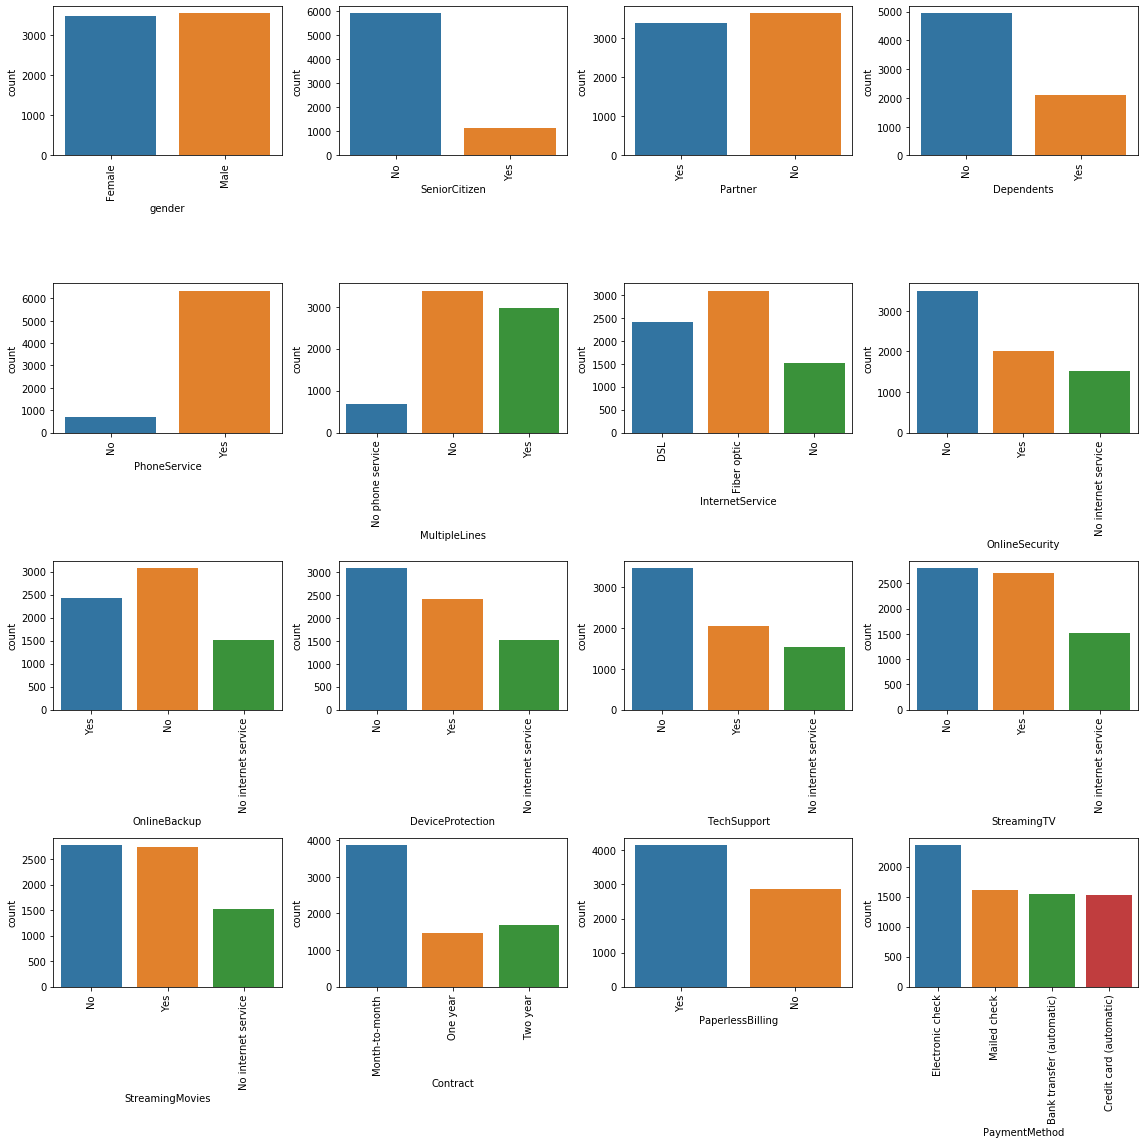

In [5]:
# countplots of all categorical features
df_col_category=df[col_category].copy()
plt.figure(figsize=(16,16))
for i in range(0,16):
        plt.subplot(4,4,i+1)
        sns.countplot(df_col_category.iloc[:,i])
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

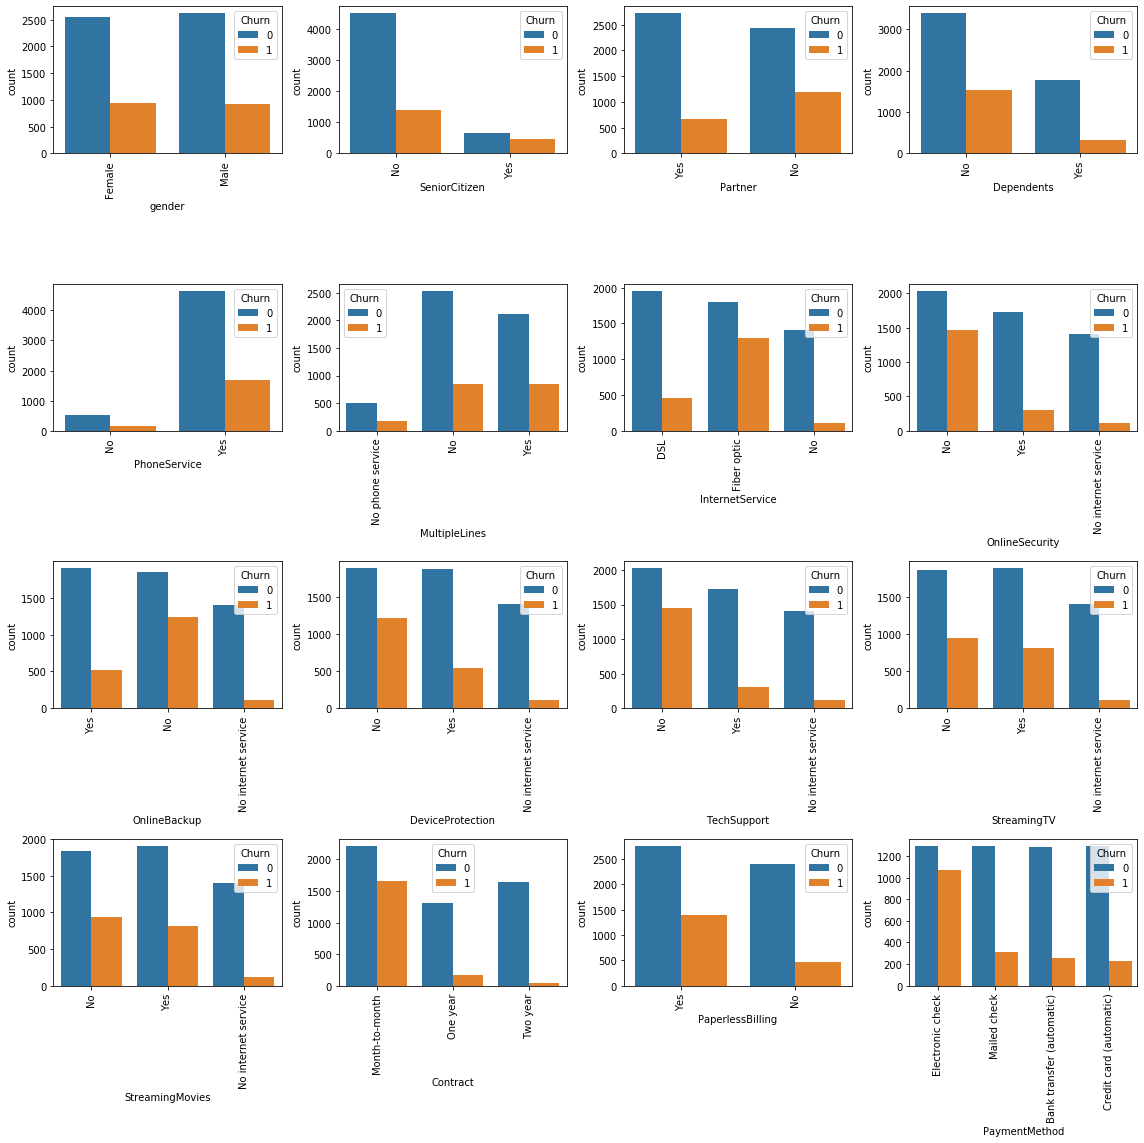

In [6]:
# countplots of all categorical features by Churn

plt.figure(figsize=(16,16))
for i in range(0,16):
        plt.subplot(4,4,i+1)
        sns.countplot(df_col_category.iloc[:,i], hue=df[col_predict[0]])
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<h3>Numerical Feature plot and Churn relationship<h3>

In [7]:
df[col_numeric].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.246862      0.825880
MonthlyCharges  0.246862        1.000000      0.651065
TotalCharges    0.825880        0.651065      1.000000


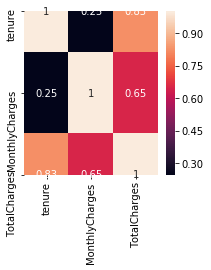

In [8]:
#Correalation between numerical features helps in understanding relationship
df_col_numeric=df[col_numeric].copy()
df_corr=df_col_numeric.corr()
print(df_corr)

plt.figure(figsize=(3,3))
sns.heatmap(df_corr, annot=True)
plt.show()


#One observation is that 'tenure' is correlated with 'TotalCharges', 
#which makes sense because the longer a contract exists, the higher the total amount paid for that contract. 0.82
#Other observation is obvious that total charges are proportional to monthly charges 0.65

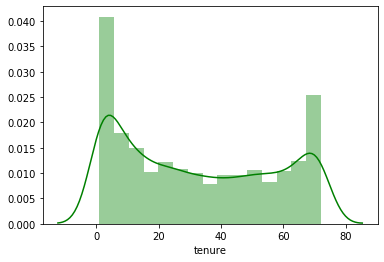

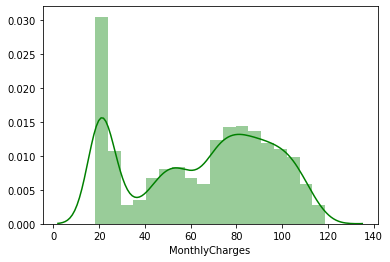

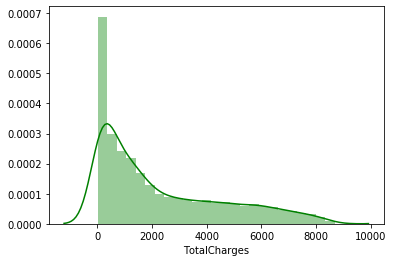

In [9]:
for col in col_numeric:
    sns.distplot(df_col_numeric[col], kde=True,color='green')
    plt.show()

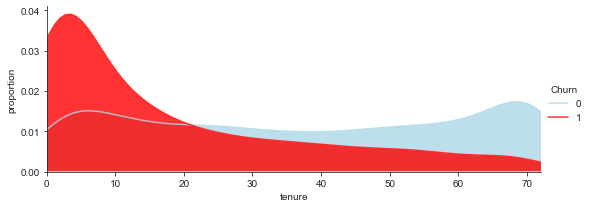

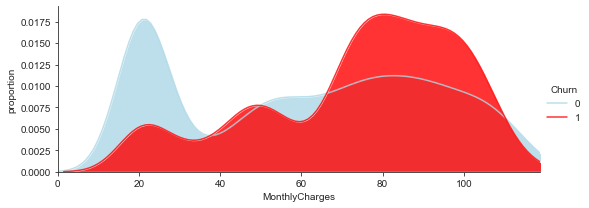

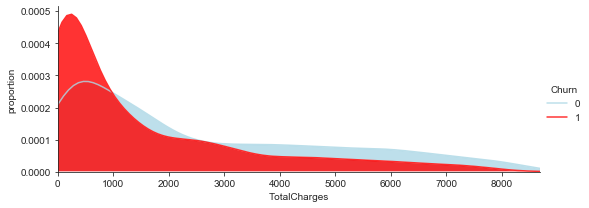

In [10]:
for col in col_numeric:
    sns.set_style("ticks")
    s = sns.FacetGrid(df, hue = 'Churn',aspect = 2.5, palette ={0 : 'lightblue', 1 : 'red'})
    s.map(sns.kdeplot,col, shade = True, alpha = 0.8)
    s.set(xlim=(0, df_col_numeric[col].max()))
    s.add_legend()
    s.set_axis_labels(col, 'proportion')
    plt.show()

<h3>Mixture of dimention in respect of churn

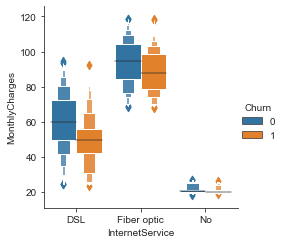

In [21]:
sns.catplot(x="InternetService", y="MonthlyCharges", hue="Churn",kind="boxen", data=df, height=3.5);

#This shows even some DSL customers have high monthly charges but they doesn't churn
#Also, Fibre optics means higher monthly charges and half of custoers are churning

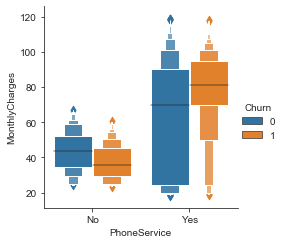

In [22]:
sns.catplot(x="PhoneService", y="MonthlyCharges", hue="Churn", kind="boxen", data=df, height=3.5);

#At any given level after 60 in monthly charges, more people churn than non-churn

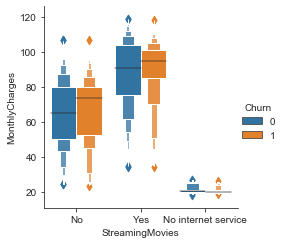

In [23]:
sns.catplot(x="StreamingMovies", y="MonthlyCharges", hue="Churn", kind="boxen", data=df, height=3.5);

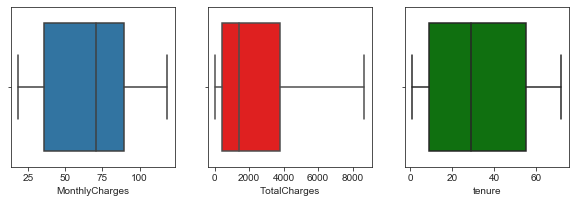

In [24]:
# boxplots of MonthlyCharges and TotalCharges to view if there are any outliers or not

plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(df_col_numeric['MonthlyCharges'])
plt.subplot(3,3,2)
sns.boxplot(df_col_numeric['TotalCharges'], color='red')
plt.subplot(3,3,3)
sns.boxplot(df_col_numeric['tenure'], color='green')
plt.show()